## Risk Prediction
### Análise exploratória dos dados de clientes de Caratão de crédito

Dados: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

### 1. Resumo  

O objetivo deste Notebook é explorar os dados, criar visualizações que facilitem o entendimento, analizar as informações do link acima e Traduzir o nomes das variáveis com a finalidade de melhor entendimento.  
Ao fim tentaremos responmder:
 1. Quantos registros(linhas) existem nos dados?
 2. Quantas Colunas existem?
 3. Existem valores Nulos?
     * se sim qual ação deve ser tomada?
 4. Existem valores Duplicados?
     * se sim qual ação deve ser tomada?
 5. Qual a classificação das variáveis?
     * há necessicade de alterar o tipo das variáveis?
 6. Qual a distribuição das variáveis Nominais?
 7. Qual a distribuição das demais variáveis?
 8. Qual é o Predito e quais são os candidatos a preditores?
 9. Os dados estão balanceados?
 10. Quais os possíveis preditores podem ser criados?
 
______________

### 2 Implementação
#### 2.1 Importação das Bibilotecas


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
#from pandas_profiling import ProfileReport

pd.options.display.max_columns = None
pd.set_option('max_colwidth', 400)
pd.options.display.float_format = '{:.2f}'.format

* Se necessário usar os comandos abaixo para instalar estas bibliotecas
~~~ Python
# !poetry add xlrd
# !poetry add pandas-profiling[notebook]
~~~

___________________
#### 2.2 Carga dos Dados

In [2]:
df = pd.read_excel("../data/raw/default of credit card clients.xls", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


* Percebemos:   
Que as colunas estão nomeadas como X1, X2....  
Que a Coluna "unnamed: 0" repete o index.  

_________________
#### 2.3 Criando o dicionário de Dados
O dicionário de dados contém o nome das colunas, o nome traduzido e a descrição que constava no "Data Set Information" do site.  

In [3]:
dicionario = df.columns.to_frame(name="Colunas").reset_index(drop=True)
dicionario["Col_Trad"] = [
    "ID",
    "limite",
    "sexo",
    "educacao",
    "estado_civil",
    "idade",
    "status_0509",
    "status_0508",
    "status_0507",
    "status_0506",
    "status_0505",
    "status_0504",
    "saldo_0509",
    "saldo_0508",
    "saldo_0507",
    "saldo_0506",
    "saldo_0505",
    "saldo_0504",
    "pago_0509",
    "pago_0508",
    "pago_0507",
    "pago_0506",
    "pago_0505",
    "pago_0504",
    "mau"]
dicionario["Descrição"] = [
    "ID",
    "Limte de Crédito",
    "(1 = masculino; 2 = feminino)",
    "Educação (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros)",
    "Estado civil (1 = casado; 2 = solteiro; 3 = outros)",
    "Idade",
    "status de pagamentos em set/2005: -1 = pago devidamente; 1 = atraso de um mês; 2 = atraso de dois meses; . . .; 8 = atraso de oito meses; 9 = atraso de nove meses ou mais",
    "status de pagamentos em ago/2005: -1 = pago devidamente; 1 = atraso de um mês; 2 = atraso de dois meses; . . .; 8 = atraso de oito meses; 9 = atraso de nove meses ou mais",
    "status de pagamentos em jul/2005: -1 = pago devidamente; 1 = atraso de um mês; 2 = atraso de dois meses; . . .; 8 = atraso de oito meses; 9 = atraso de nove meses ou mais",
    "status de pagamentos em jun/2005: -1 = pago devidamente; 1 = atraso de um mês; 2 = atraso de dois meses; . . .; 8 = atraso de oito meses; 9 = atraso de nove meses ou mais",
    "status de pagamentos em mai/2005: -1 = pago devidamente; 1 = atraso de um mês; 2 = atraso de dois meses; . . .; 8 = atraso de oito meses; 9 = atraso de nove meses ou mais",
    "status de pagamentos em abr/2005: -1 = pago devidamente; 1 = atraso de um mês; 2 = atraso de dois meses; . . .; 8 = atraso de oito meses; 9 = atraso de nove meses ou mais",
    "Saldo em set/2005",
    "Saldo em ago/2005",
    "Saldo em jul/2005",
    "Saldo em jun/2005",
    "Saldo em mai/2005",
    "Saldo em abr/2005",
    "Valor pago em set/2005",
    "Valor pago em ago/2005",
    "Valor pago em jul/2005",
    "Valor pago em jun/2005",
    "Valor pago em mai/2005",
    "Valor pago  em abr/2005",
    "Pagamento próximo mês (Sim = 1, Não = 0)"]

dicionario

,Colunas,Col_Trad,Descrição
0,ID,ID,ID
1,LIMIT_BAL,limite,Limte de Crédito
2,SEX,sexo,(1 = masculino; 2 = feminino)
3,EDUCATION,educacao,Educação (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros)
4,MARRIAGE,estado_civil,Estado civil (1 = casado; 2 = solteiro; 3 = outros)
5,AGE,idade,Idade
6,PAY_0,status_0509,status de pagamentos em set/2005: -1 = pago devidamente; 1 = atraso de um mês; 2 = atraso de dois meses; . . .; 8 = atraso de oito meses; 9 = atraso de nove meses ou mais
7,PAY_2,status_0508,status de pagamentos em ago/2005: -1 = pago devidamente; 1 = atraso de um mês; 2 = atraso de dois meses; . . .; 8 = atraso de oito meses; 9 = atraso de nove meses ou mais
8,PAY_3,status_0507,status de pagamentos em jul/2005: -1 = pago devidamente; 1 = atraso de um mês; 2 = atraso de dois meses; . . .; 8 = atraso de oito meses; 9 = atraso de nove meses ou mais
9,PAY_4,status_0506,status de pagamentos em jun/2005: -1 = pago devidamente; 1 = atraso de um mês; 2 = atraso de dois meses; . . .; 8 = atraso de oito meses; 9 = atraso de nove meses ou mais


In [4]:
dicionario.to_csv("../references/dicionario_dados.csv", index=False)

Salvando o dicionário na pasta de referências

*********************************
### 3 Analise preliminar
#### 3.1 Informações básicas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

OBS.: Todas as linhas possuem a mesma contagem e todas são do tipo object(String)  
  
  

_________________
#### 3.2 Quantos registros (linhas) e Colunas existem nos dados?

In [7]:
linhas = df.shape[0]
colunas = df.shape[1]

display(HTML(f'<h5> O Data Frame possui <span style="color:red">{linhas}</span> linhas e <span style="color:red">{colunas}</span> Colunas.</h5>'))

____________________
#### 3.3 Existem Valores Nulos?
 * se sim qual ação deve ser tomada?

In [8]:
df.isnull().sum().to_frame(name = "Soma de Nulos por variável")

,Soma de Nulos por variável
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [9]:
tot_nulos = df.isnull().sum().sum()
display(HTML(f'<h5> A quantidade total de nulos do data frame é: <span style="color:red">{tot_nulos}</span> registros.</h5>'))

____________
####  3.4 Existem valores Duplicados?
     * se sim qual ação deve ser tomada?

In [10]:
duplicados = df['ID'].duplicated()
duplicados = duplicados.sum()
display(HTML(f'<h5> O Data Frame possui <span style="color:red">{duplicados}</span> valores duplicados.</h5>'))

__________
#### 3.5 Qual a classificação das variáveis?
     * há necessicade de alterar o tipo das variáveis?

**Inuteis:**   
  ID 
  
 * Optou-se por excluir a vareável ID

In [11]:
df.pop("ID")
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Nominais:**
* Apesar da variável "education" normalmente ser classificada como qualitativa ordinal, neste caso decidimos classificar como nominal pois o grupo "outros" poderia conter tanto analfabeto e ensino fundamental quanto mestrado e doutorado quebrando assim a relação de ordenação.

In [12]:
sex = {1: "masculino", 2: "feminino"}
education = {1: "pós-graduação", 2: "universidade", 3: "ensino médio", 4: "outros"}
mariage = {1: "casado", 2: "solteiro", 3: "outros"}

**Ordinais:**

In [13]:
var_ordinais = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
                   'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                   'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                   'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

**Binárias:**

'default payment next month'

In [14]:
mau = {0: "nao", 1: "sim"}

_____________
#### 4 Correção do tipo  
**Variáveis numéricas**

In [15]:
# Criando uma cópia para comparação
df_orig = df.copy()

In [16]:
df[var_ordinais] = df[var_ordinais].astype(int)

**variáveis categóricas e Binárias:**

In [17]:
df["SEX"] = df["SEX"].map(sex)
df["EDUCATION"] = df["EDUCATION"].map(education)
df["MARRIAGE"] = df["MARRIAGE"].map(mariage)
df['default payment next month'] = df['default payment next month'].map(mau)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,feminino,universidade,casado,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,sim
1,120000,feminino,universidade,solteiro,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,sim
2,90000,feminino,universidade,solteiro,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,nao
3,50000,feminino,universidade,casado,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,nao
4,50000,masculino,universidade,casado,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,nao


____________
### 5 Traduz Colunas

In [18]:
df.columns = dicionario['Col_Trad'].to_list()[1:]
df

,limite,sexo,educacao,estado_civil,idade,status_0509,status_0508,status_0507,status_0506,status_0505,status_0504,saldo_0509,saldo_0508,saldo_0507,saldo_0506,saldo_0505,saldo_0504,pago_0509,pago_0508,pago_0507,pago_0506,pago_0505,pago_0504,mau
0,20000,feminino,universidade,casado,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,sim
1,120000,feminino,universidade,solteiro,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,sim
2,90000,feminino,universidade,solteiro,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,nao
3,50000,feminino,universidade,casado,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,nao
4,50000,masculino,universidade,casado,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,masculino,ensino médio,casado,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,nao
29996,150000,masculino,ensino médio,solteiro,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,nao
29997,30000,masculino,universidade,solteiro,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,sim
29998,80000,masculino,ensino médio,casado,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,sim


__________
### 6 Pandas Profiling

In [19]:
profile = ProfileReport(df, title="Pandas Profiling Report - DATA GEAR", explorative=True)
profile

Salvar o report inicial

In [20]:
profile.to_file("../references/Report_inicial.html")

__________
### 7 Análise

In [21]:
# procurando novamente por valores faltantes após renomear campos
df.isnull().sum().to_frame(name = "Soma de Nulos")

,Soma de Nulos
limite,0
sexo,0
educacao,345
estado_civil,54
idade,0
status_0509,0
status_0508,0
status_0507,0
status_0506,0
status_0505,0


In [22]:
# buscando nos daos originais o motivo dos nulos
df_orig['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

* Existem <span style="color:red">54</span> valores registrados como código <span style="color:red">0</span>, código que não havia na descrição dos dados.  
Avaliar a possibilidade de incluír junto a outrtos(código = 3)

In [23]:
df_orig['EDUCATION'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

 * Encontramos <span style="color:red">345</span> dados classificados nos códigos 0, 5 e 6. Verificamos que trata-se de dados classificados com códigos que não constavam na descrição dos dados no site da UCI.  
Avaliar a possibilidade de incluír junto a outrtos(código = 4)

_____________
### 8 .Correção dos dados  
Transformaremos os nulos em "outros" e logo depois analizaremso a distribuição de outros para verificar a relevância

In [24]:
df['educacao'].fillna('outros', inplace=True)
df['estado_civil'].fillna('outros', inplace=True)

In [25]:
# verificando se existem nulos
tot_nulos =str(df.isnull().sum().sum())
display(HTML(f'<h5> A quantiodade total de nulos do data frame é: <span style="color:red">{tot_nulos}</span> registros.</h5>'))

___________
### 9 Análise Gráfica
#### 9.1 Qual a distribuição das variáveis Nominais?

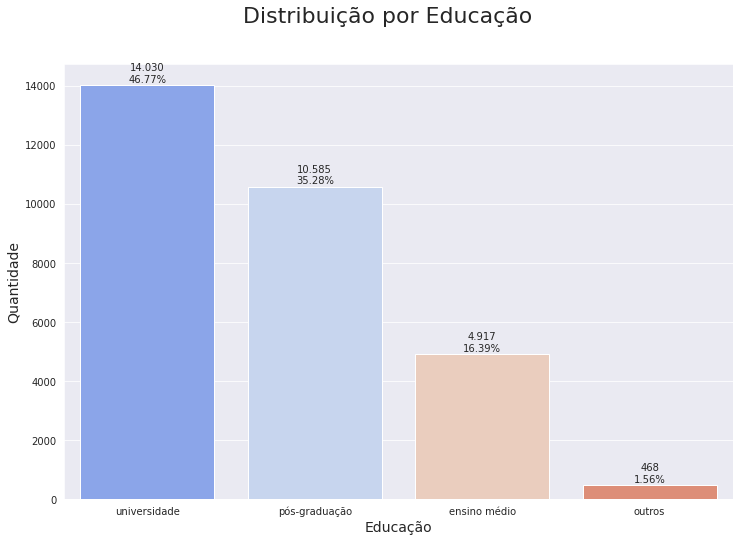

In [27]:
sns.set_style('darkgrid')
ax = sns.countplot( data=df, x='educacao', palette='coolwarm')
ax.figure.set_size_inches(12, 8)
total = float(len(df))
for p in ax.patches:
    valores = "{0}\n{1:.2f}%".format(f'{p.get_height():_.2f}'.replace('.',',').replace('_','.')[:-3],100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 100
    ax.annotate(valores, (x, y),ha='center')
plt.suptitle('Distribuição por Educação', fontsize=22)
plt.ylabel('Quantidade', size=14)
plt.xlabel('Educação', size=14)
plt.show()

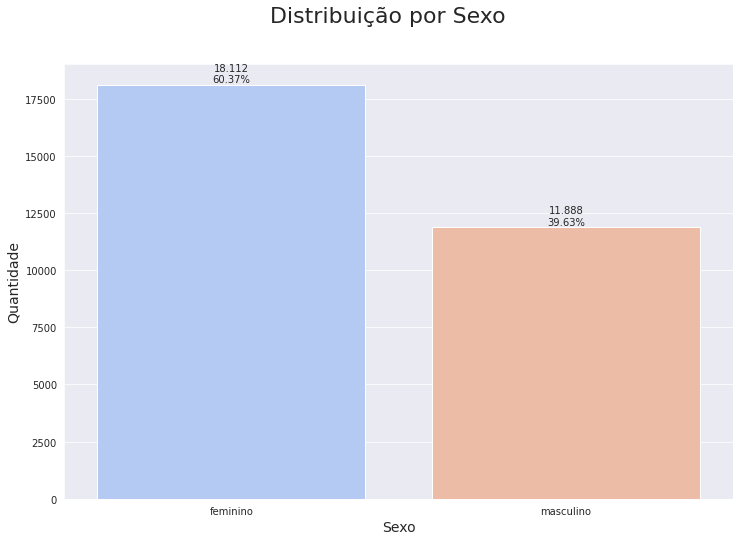

In [28]:
sns.set_style('darkgrid')
ax = sns.countplot( data=df, x='sexo', palette='coolwarm')
ax.figure.set_size_inches(12, 8)
total = float(len(df))
for p in ax.patches:
    valores = "{0}\n{1:.2f}%".format(f'{p.get_height():_.2f}'.replace('.',',').replace('_','.')[:-3],100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 100
    ax.annotate(valores, (x, y),ha='center')
plt.suptitle('Distribuição por Sexo', fontsize=22)
plt.ylabel('Quantidade', size=14)
plt.xlabel('Sexo', size=14)
plt.show()

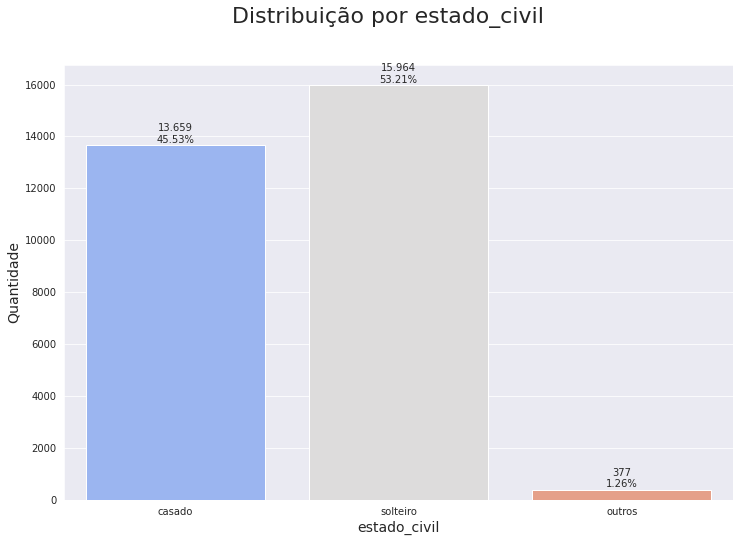

In [29]:
sns.set_style('darkgrid')
ax = sns.countplot( data=df, x='estado_civil', palette='coolwarm')
ax.figure.set_size_inches(12, 8)
total = float(len(df))
for p in ax.patches:
    valores = "{0}\n{1:.2f}%".format(f'{p.get_height():_.2f}'.replace('.',',').replace('_','.')[:-3],100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 100
    ax.annotate(valores, (x, y),ha='center')
plt.suptitle('Distribuição por estado_civil', fontsize=22)
plt.ylabel('Quantidade', size=14)
plt.xlabel('estado_civil', size=14)
plt.show()

 * Mesmo após unir os nulos gerados durante a categorização das variáveis estado civil e educação os valores de "outros", destas variáveis continuam pouco significativa: 
 1,26% em estado civil e  
 1,56% em educação.

#### 9.2 Qual a distribuição das demais variáveis?

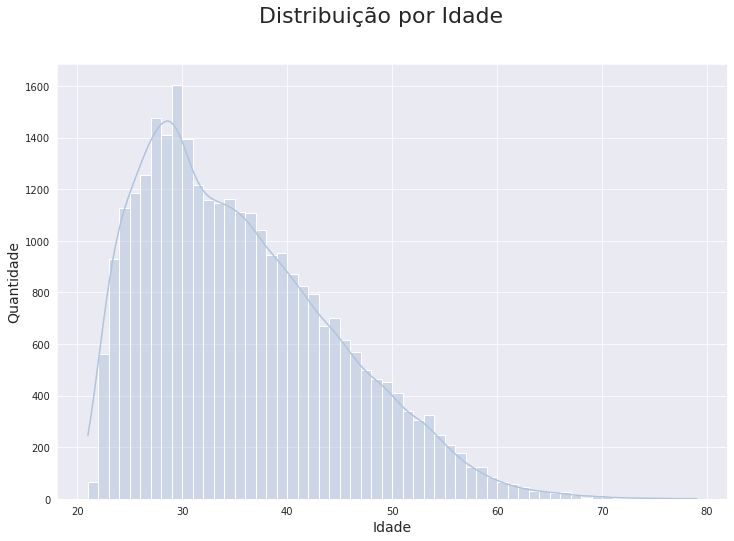

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="idade",bins=58 ,kde=True, color='lightsteelblue', edgecolor='white',)
plt.suptitle('Distribuição por Idade', fontsize=22)
plt.ylabel('Quantidade', size=14)
plt.xlabel('Idade', size=14)
plt.show()

* Durante a analize através do Pandas profiling, foi verificado picos no histograma de Idade.
a mudança de bins mostrou a real situação:

In [31]:
df.groupby('idade')['limite'].count().to_frame(name='Quantidades').style.background_gradient(cmap="Blues")

,Quantidades
idade,
21,67
22,560
23,931
24,1127
25,1186
26,1256
27,1477
28,1409
29,1605


In [32]:
df.groupby('idade')['limite'].count().to_frame(name='Quantidades').style.bar( color='lightsteelblue')

,Quantidades
idade,
21,67
22,560
23,931
24,1127
25,1186
26,1256
27,1477
28,1409
29,1605


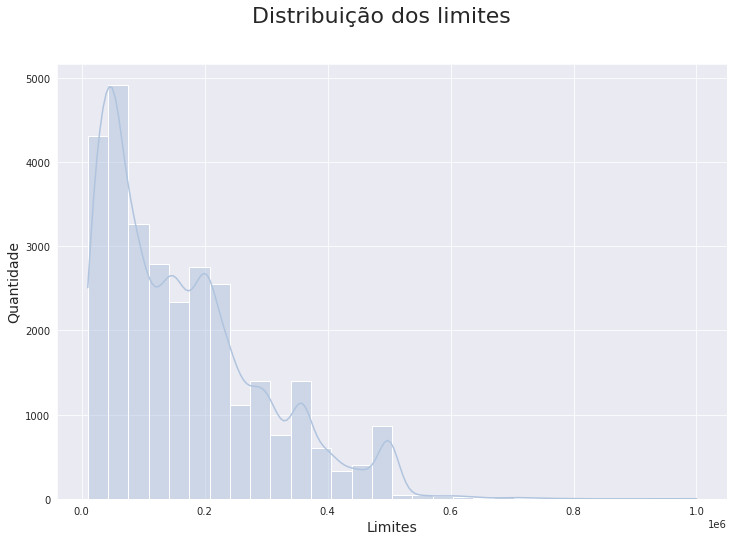

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="limite",bins=30 ,kde=True,color='lightsteelblue', edgecolor='white',)
plt.suptitle('Distribuição dos limites', fontsize=22)
plt.ylabel('Quantidade', size=14)
plt.xlabel('Limites', size=14)
plt.show()

<AxesSubplot:>

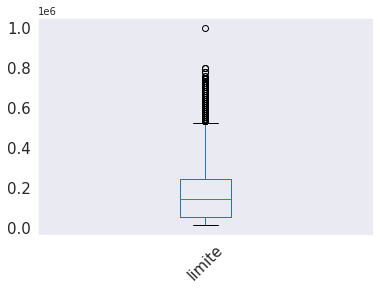

In [38]:
df[['limite']].boxplot(grid=False, rot=45, fontsize=15)  

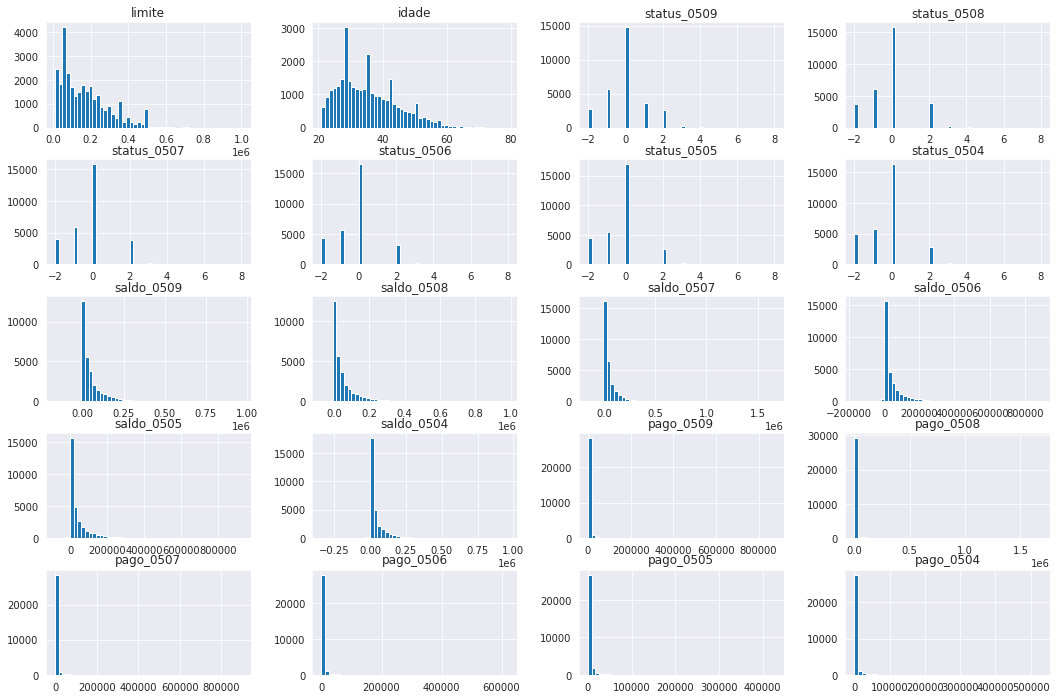

In [39]:
df.hist(bins=50, figsize=(18,12))
plt.show()

/tmp/ipykernel_2296/3797600517.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = df[[col for col in df if col.startswith('status_')]].hist(bins=30, color='lightsteelblue', edgecolor='white', linewidth=1.0,


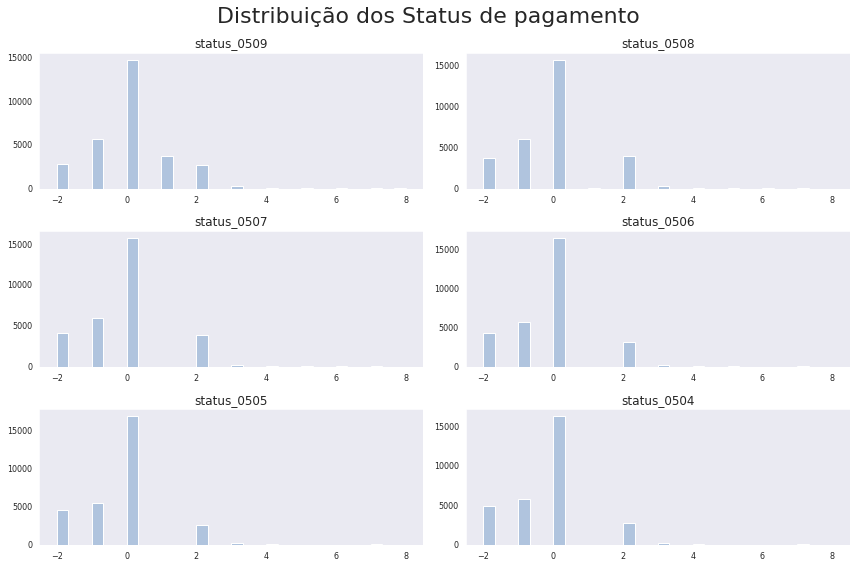

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = df[[col for col in df if col.startswith('status_')]].hist(bins=30, color='lightsteelblue', edgecolor='white', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)  
ax.ticklabel_format(useOffset=False, style='plain', axis='both')
plt.suptitle('Distribuição dos Status de pagamento', fontsize=22)
plt.tight_layout()   
plt.show()

/tmp/ipykernel_2296/3991261664.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = df[[col for col in df if col.startswith('saldo_')]].hist(bins=30, color='lightsteelblue', edgecolor='white', linewidth=1.0,


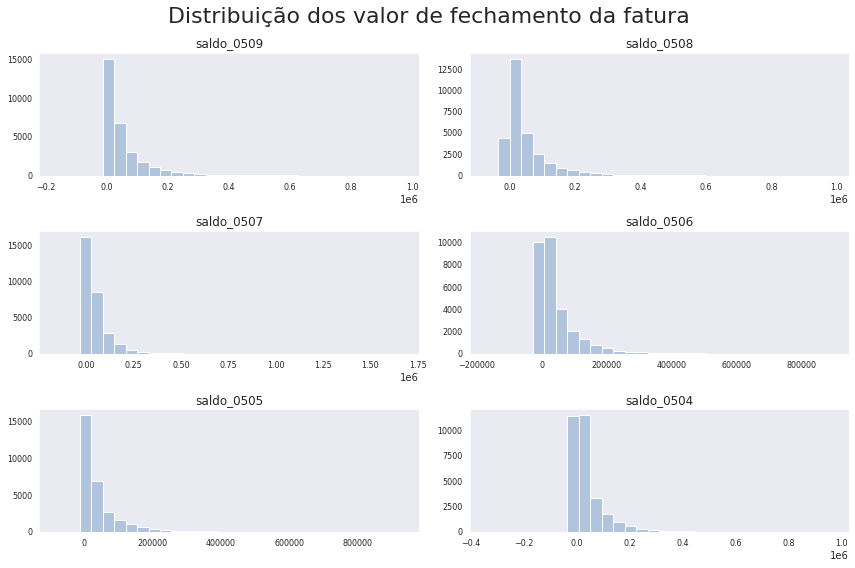

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = df[[col for col in df if col.startswith('saldo_')]].hist(bins=30, color='lightsteelblue', edgecolor='white', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
ax.ticklabel_format(useOffset=False, style='plain', axis='both')
plt.suptitle('Distribuição dos valor de fechamento da fatura', fontsize=22)
plt.tight_layout()   

/tmp/ipykernel_2296/2318820311.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = df[[col for col in df if col.startswith('pago_')]].hist(bins=30, color='lightsteelblue', edgecolor='white', linewidth=1.0,


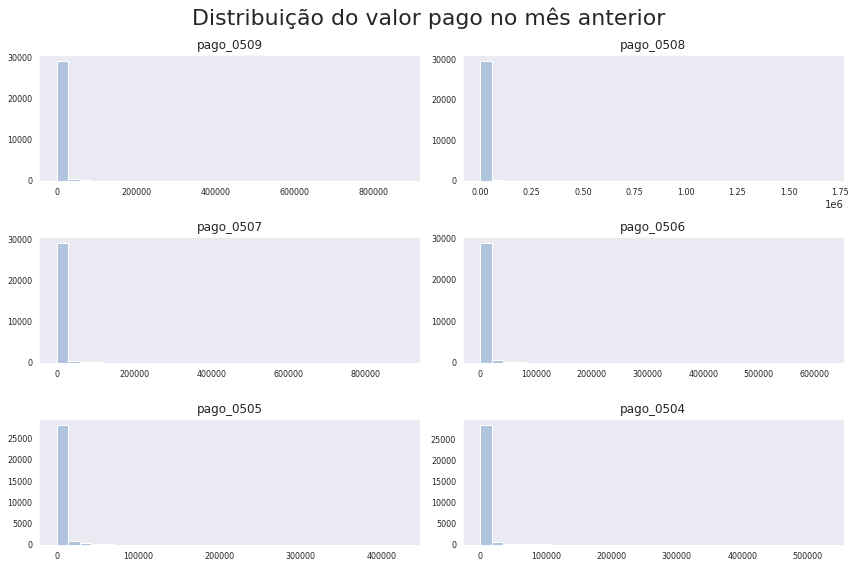

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = df[[col for col in df if col.startswith('pago_')]].hist(bins=30, color='lightsteelblue', edgecolor='white', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
ax.ticklabel_format(useOffset=False, style='plain', axis='both')
plt.suptitle('Distribuição do valor pago no mês anterior', fontsize=22)
plt.tight_layout()   

______________
### 10 Qual é o Predito e quais são os candidatos a preditores?

In [43]:
predito = 'mau'
prediotres = df.columns[:-1]

In [44]:
display(HTML(f'<h5> O predito, alvo ou target é a variável: <span style="color:red">{predito}</span>.</h5>'))

In [45]:
prediotres.to_frame(name='Preditores').reset_index(drop=True)

,Preditores
0,limite
1,sexo
2,educacao
3,estado_civil
4,idade
5,status_0509
6,status_0508
7,status_0507
8,status_0506
9,status_0505


___________
### 11 Os dados estão balanceados?

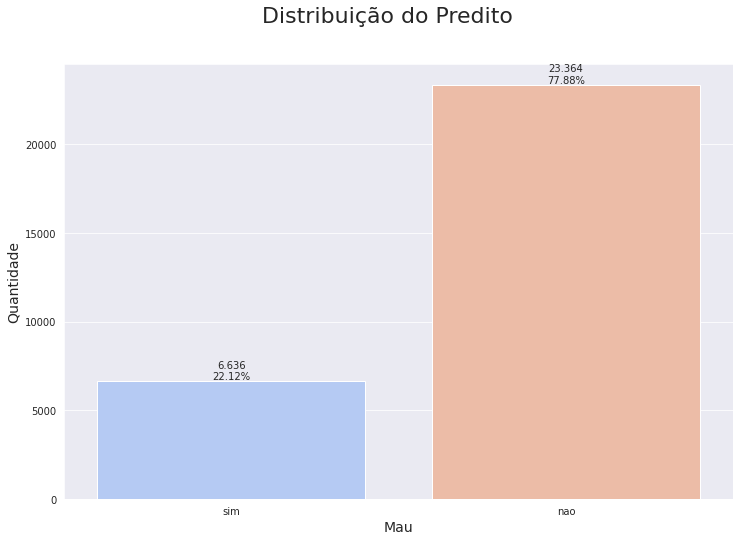

In [46]:
sns.set_style('darkgrid')
ax = sns.countplot( data=df, x='mau', palette='coolwarm')
ax.figure.set_size_inches(12, 8)
total = float(len(df))
for p in ax.patches:
    valores = "{0}\n{1:.2f}%".format(f'{p.get_height():_.2f}'.replace('.',',').replace('_','.')[:-3],100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 100
    ax.annotate(valores, (x, y),ha='center')
plt.suptitle('Distribuição do Predito', fontsize=22)
plt.ylabel('Quantidade', size=14)
plt.xlabel('Mau', size=14)
plt.show()

In [47]:
display(HTML(f'<h5> O Grafico acima mostra que os dados <span style="color:red">não</span> estão balenceados.</h5>'))

### 12 Salvamento dos dados pré processados

In [49]:
dicionario.to_csv("../data/interim/data_pre_processados.csv", index=False)

### 13 Insights

#### Após a analise dos dados chegamos as seguintes constatações:

 * Os dados não estão balanceados com relação ao predito
 * Os dados descritos na legenda original do conjunto de dados não englobavam todos os ranges dos itens relacionados na base, assim foi adequado unificar os valores que estavam fora da classificação da legenda original em uma categoria chamada outros, tendo o impacto na análise dos dados de forma ínfima, sendo menor que 2% no caso da categoria educação 1,56% e 1,26% na categoria estado civil.
 * As variáveios de estatus apresentavam os valores -2  0 que não estavam na documentação, em pesquisa na literatura encontramos que -2 refere-se a fatura fechada com valor Zero e o marca o cliente que pagou um valor menor que o valor de fechamento da fatura.
 * A maoipr parte das concessões de cartões de crédito foram para coleites com nível superior e pós-graduação.
 * O publico feminino detem a maioria dos cartões.
 * A faixa etária com mais cartões é entre 25 e 35 anos.
 * Temos uma maior quantodade de pequenos limites distribuidos, quanto maior o limite menos concessões foram feitas.